In [58]:
import numpy as np
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy.visualization import quantity_support
from specutils import Spectrum1D
quantity_support() 

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x75228931dca0>

In [50]:
# A  random array of 2 variables 
x = np.linspace(0,10, 100)
y= np.sin(x)

In [52]:
# Introducing gaussian noise to data
noise =  np.random.normal(0, 0.1, x.shape)
ynoise = y + noise

In [55]:
#Do spline fit # s is smooth factor
spfit= splrep(x, ynoise, s=1)
x_fine = np.linspace(0, 10, 100)
#Evaluate the spline
y_fine = splev(x_fine, spfit)

In [57]:
plt.plot(x_fine, y_fine)
plt.plot(x,ynoise)
plt.close()

In [59]:
#Load a fits spectra file from sdss with with loop
filename='/home/kevin/aufklarung_astro_station/sdss_spectra/spec-1678-53433-0001.fits'
with fits.open(filename) as f:
    specdata=f[1].data
    header_data=f[0].header

#convert the log lam and flux to proper units 
lamb=10**specdata['loglam'] * u.AA
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
#put the lamb and flux to the 1d specutils object
spectrum= Spectrum1D(spectral_axis=lamb, flux=flux)

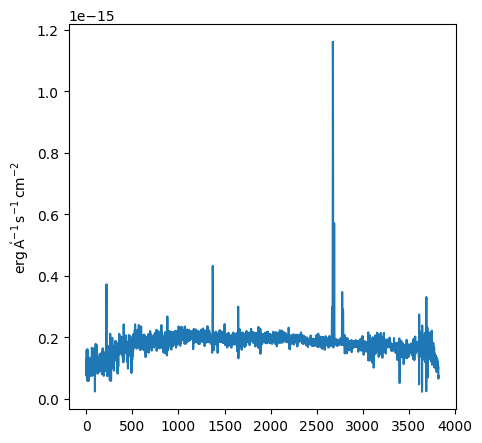

In [71]:
#plot the spectra
fig,ax=plt.subplots(figsize=(5,5))

#ax.step( spectrum.spectral_axis, spectrum.flux)
ax.plot(spectrum.flux)
#fig.savefig(filename[:-5]+'spectra.jpg')

In [152]:
#Do spline fit # s is smooth factor
spfit_spectra= splrep(np.array(spectrum.spectral_axis), np.array(spectrum.flux), s=0.01, k=5)
#x_fine = np.linspace(0, 10, 100)
#Evaluate the spline
fitted_spectra = splev(np.array(spectrum.spectral_axis), spfit_spectra)

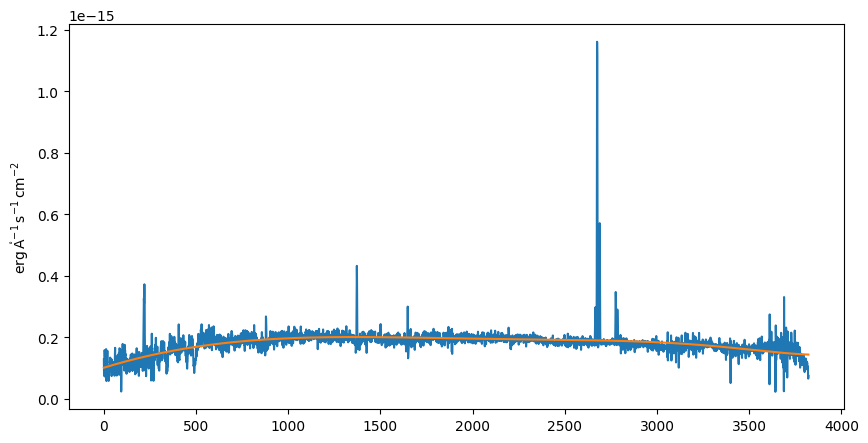

In [155]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(spectrum.flux)
ax.plot(fitted_spectra)
